In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
print('Imports loaded')

Imports loaded


In [6]:
df = pd.read_csv(r"c:\Users\LENOVO\Downloads\diabetic_data.csv\diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
print(df.isnull().sum())
print(df.isnull().sum().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())
print(df_cleaned.isnull().any().any())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [ ]:
import numpy as np
import pandas as pd

midpoints = {
    "[0-25)": 12.5,
    "[25-50)": 37.5,
    "[50-75)": 62.5,
    "[75-100)": 87.5,
    "[100-125)": 112.5,
    "[125-150)": 137.5,
    "[150-175)": 162.5,
    "[175-200)": 187.5,
    ">200": 210
}

freq_table = df["weight"].value_counts(dropna=True)
valid_bins = {b: c for b, c in freq_table.items() if b in midpoints}

if valid_bins:
    weighted_mean = np.average(
        [midpoints[b] for b in valid_bins],
        weights=[valid_bins[b] for b in valid_bins]
    )
else:
    weighted_mean = np.nan  

print(f"Weighted mean (if available): {weighted_mean}")

df["weight"] = df["weight"].replace(midpoints)
df["weight"] = df["weight"].replace(["?", "??", "unknown", "NA", "nan"], np.nan)

df["weight"] = pd.to_numeric(df["weight"], errors="coerce")

min_val, max_val = 40, 120 
nan_mask = df["weight"].isna()

df.loc[nan_mask, "weight"] = np.random.uniform(min_val, max_val, nan_mask.sum())

print(df["weight"].head(20))
print("\nColumn type:", df["weight"].dtype)
print("Any NaNs left?", df["weight"].isna().sum())


Weighted mean (if available): nan
0     105.380319
1      61.321963
2      69.279111
3      95.520459
4      81.719759
5      97.883826
6      49.938769
7      49.826035
8      84.138265
9      94.605197
10    114.995911
11    110.905725
12     49.973183
13     81.605803
14     53.755166
15     48.516760
16     61.503635
17     43.682222
18    116.533120
19     52.492366
Name: weight, dtype: float64

Column type: float64
Any NaNs left? 0


In [ ]:
import pandas as pd
target_col = "readmitted"

if target_col not in df.columns:
    print(f" WARNING: Target column '{target_col}' not found in dataset. Please update `target_col`.")
else:
    print(f" Target column found: '{target_col}'")

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()


num_cols = [col for col in num_cols if col != target_col]
cat_cols = [col for col in cat_cols if col != target_col]
print("\n Column Summary")
print("-" * 40)
print(f"Numeric columns count: {len(num_cols)}")
print(f"Categorical columns count: {len(cat_cols)}")

print("\n Numeric columns:", num_cols[:10] if num_cols else "None")
print("Categorical columns:", cat_cols[:10] if cat_cols else "None")


 Target column found: 'readmitted'

 Column Summary
----------------------------------------
Numeric columns count: 14
Categorical columns count: 35

 Numeric columns: ['encounter_id', 'patient_nbr', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']
Categorical columns: ['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']


In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
)

print("Train/Test shapes:", X_train.shape, X_test.shape)


Train/Test shapes: (81412, 49) (20354, 49)



--- Model Evaluation Results ---
Model: Logistic Regression (Calibrated)
Accuracy Score: 0.5812

Classification Report:
              precision    recall  f1-score   support

         <30       0.41      0.01      0.01      2272
         >30       0.53      0.25      0.34      7109
          NO       0.59      0.91      0.72     10973

    accuracy                           0.58     20354
   macro avg       0.51      0.39      0.36     20354
weighted avg       0.55      0.58      0.51     20354


Confusion Matrix:
[[   16   628  1628]
 [   16  1807  5286]
 [    7   959 10007]]


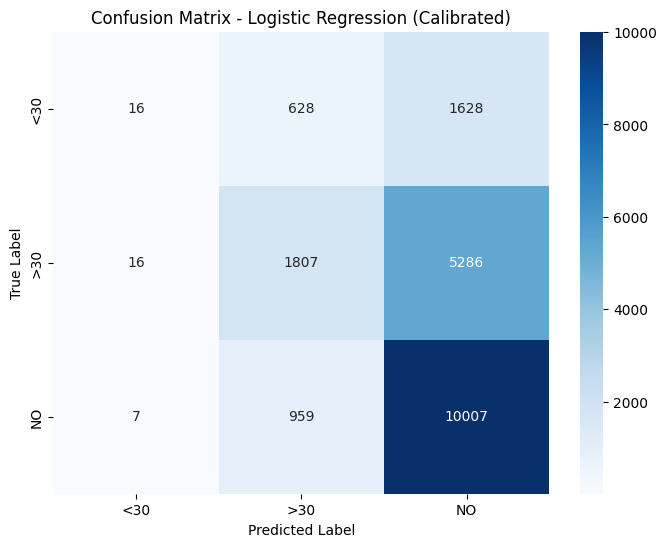

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target_col = "readmitted"
if target_col not in df.columns:
    raise KeyError(f"Target column '{target_col}' not found in dataset!")


X = df.drop(columns=[target_col])
y = df[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # << fast replacement for IterativeImputer
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))  # updated param

])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
], remainder="drop")
base_model = LogisticRegression(max_iter=1000, random_state=42)
calibrated_model = CalibratedClassifierCV(
    estimator=Pipeline(steps=[("pre", preprocessor), ("clf", base_model)]),
    cv=2, 
    method="sigmoid",
    ensemble=True
)

calibrated_model.fit(X_train, y_train_encoded)


y_pred_encoded = calibrated_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation Results ---")
print(f"Model: Logistic Regression (Calibrated)")
print(f"Accuracy Score: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_labels = le.classes_ 
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Calibrated)")
plt.show()


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=RANDOM_STATE),
    "Linear SVM": LinearSVC(max_iter=2000, random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=10, n_jobs=-1, random_state=RANDOM_STATE
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100, max_depth=5, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8, eval_metric="logloss",
        use_label_encoder=False, random_state=RANDOM_STATE
    )
}

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipe.fit(X_train, y_train_encoded)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test_encoded, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.5823
Linear SVM Accuracy: 0.5795
Random Forest Accuracy: 0.5422
XGBoost Accuracy: 0.6081


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

RANDOM_STATE = 42
N_ESTIMATORS_RF = 100
N_ESTIMATORS_XGB = 100
XGBOOST_AVAILABLE = True  

target_col = "readmitted"
X = df.drop(columns=[target_col])
y = df[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])


rf_clf = RandomForestClassifier(
    n_estimators=N_ESTIMATORS_RF,
    max_depth=12,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

lsvc = LinearSVC(
    max_iter=20000,
    dual=False,
    class_weight='balanced',
    random_state=RANDOM_STATE
)

if XGBOOST_AVAILABLE:
    n_pos = int(y_train_encoded.sum())
    n_neg = len(y_train_encoded) - n_pos
    scale_pos_weight = max(1.0, n_neg / max(1, n_pos))
    xgb_clf = XGBClassifier(
        n_estimators=N_ESTIMATORS_XGB,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method='hist',
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
else:
    xgb_clf = None
models = {
    "Random Forest": rf_clf,
    "Linear SVC": lsvc,
}

if xgb_clf is not None:
    models["XGBoost"] = xgb_clf

trained_models = {}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    print(f"Training {name}...")
    pipe.fit(X_train, y_train_encoded)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test_encoded, y_pred)
    trained_models[name] = pipe
    print(f"{name} Accuracy: {acc:.4f}\n")


Training Random Forest...
Random Forest Accuracy: 0.5085

Training Linear SVC...
Linear SVC Accuracy: 0.5561

Training XGBoost...
XGBoost Accuracy: 0.6104




--- Calculating Permutation Importance ---

Top 10 Permutation Importances:
number_inpatient            0.074124
discharge_disposition_id    0.013133
insulin_No                  0.011426
glipizide_No                0.009728
metformin_No                0.007533
metformin_Steady            0.007236
insulin_Steady              0.007181
age_[70-80)                 0.006129
number_diagnoses            0.006103
pioglitazone_Steady         0.006088
dtype: float64


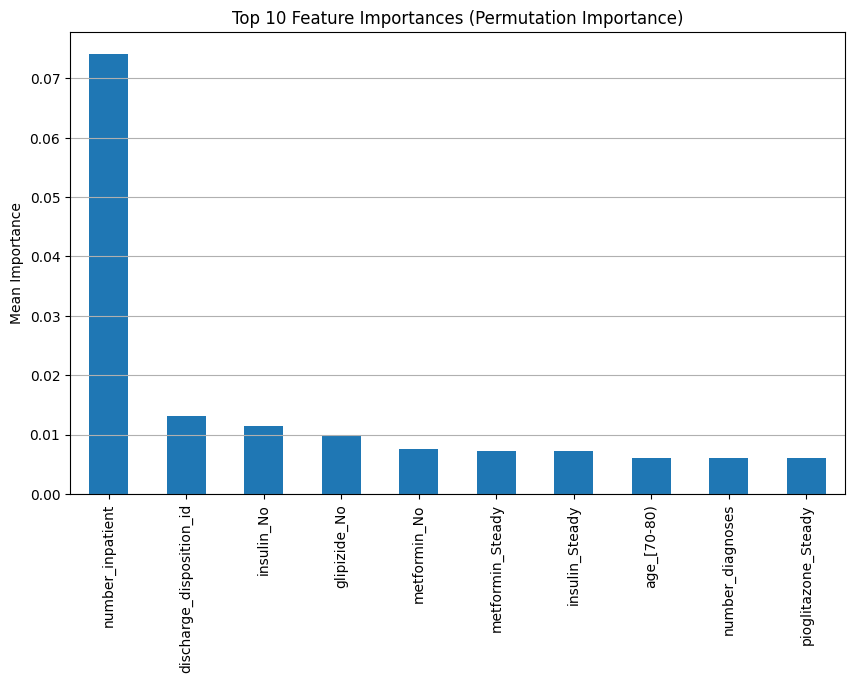

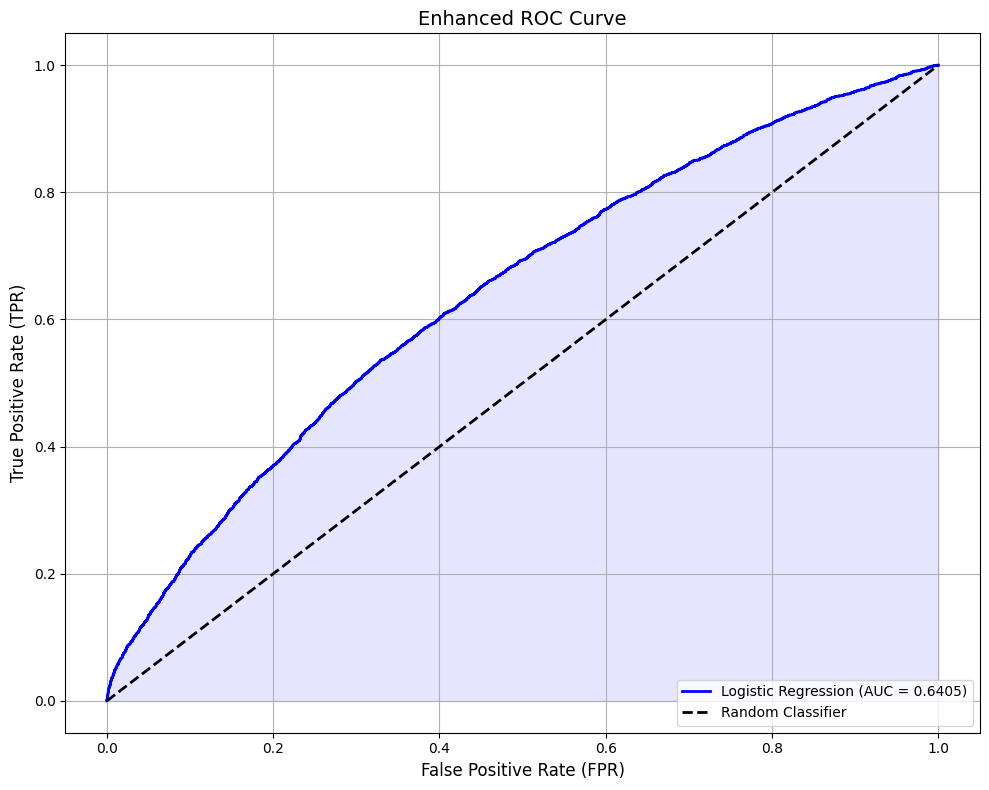

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.inspection import permutation_importance

print("\n--- Calculating Permutation Importance ---")
perm_importance = permutation_importance(
    logreg,
    X_test_encoded,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)

imp = pd.Series(perm_importance.importances_mean, index=X_test_encoded.columns)
imp = imp.sort_values(ascending=False)
print("\nTop 10 Permutation Importances:")
print(imp.head(10))

plt.figure(figsize=(10,6))
imp.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (Permutation Importance)')
plt.ylabel('Mean Importance')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange']  
for i, (name, model) in enumerate(trained.items()):
    probs = model.predict_proba(X_test_encoded)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'{name} (AUC = {auc_score:.4f})')
    
    plt.fill_between(fpr, 0, tpr, color=colors[i % len(colors)], alpha=0.1)

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Enhanced ROC Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


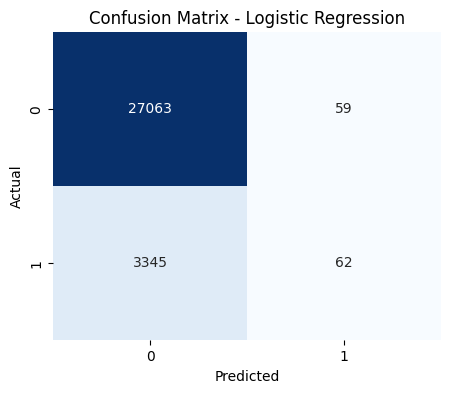


--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27122
           1       0.51      0.02      0.04      3407

    accuracy                           0.89     30529
   macro avg       0.70      0.51      0.49     30529
weighted avg       0.85      0.89      0.84     30529



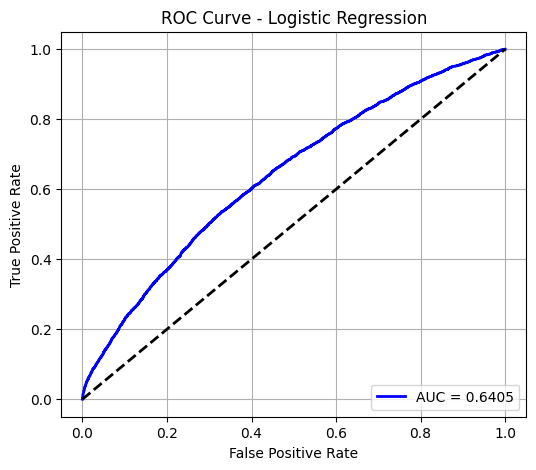

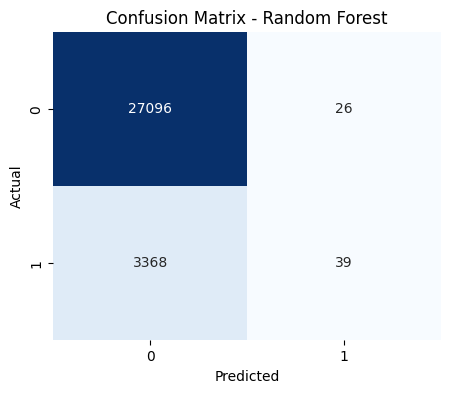


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27122
           1       0.60      0.01      0.02      3407

    accuracy                           0.89     30529
   macro avg       0.74      0.51      0.48     30529
weighted avg       0.86      0.89      0.84     30529



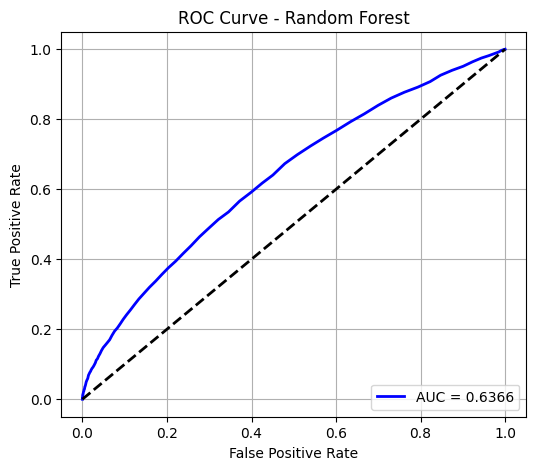

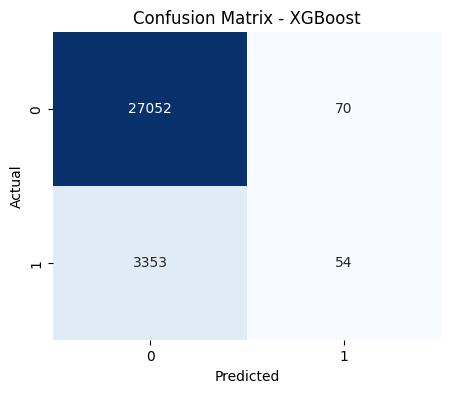


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27122
           1       0.44      0.02      0.03      3407

    accuracy                           0.89     30529
   macro avg       0.66      0.51      0.49     30529
weighted avg       0.84      0.89      0.84     30529



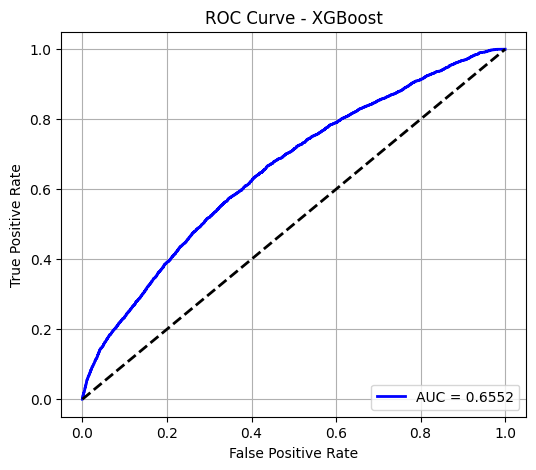

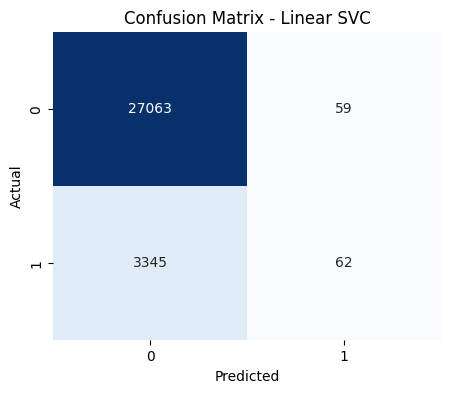


--- Linear SVC Classification Report ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27122
           1       0.51      0.02      0.04      3407

    accuracy                           0.89     30529
   macro avg       0.70      0.51      0.49     30529
weighted avg       0.85      0.89      0.84     30529



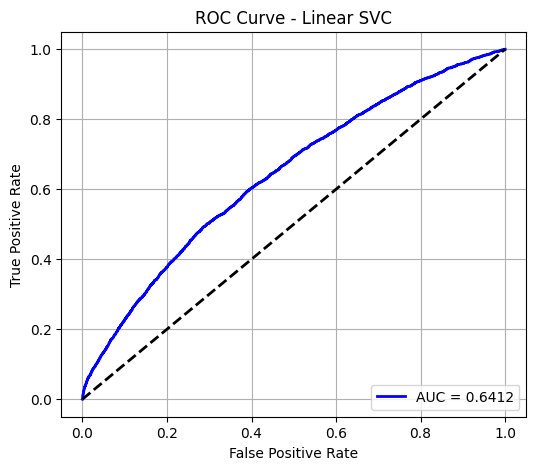

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
def clean_feature_names(df):
    df.columns = [c.replace('[','_').replace(']','').replace('<','_').replace('>','_').replace(' ','_') for c in df.columns]
    return df

X_train_encoded = clean_feature_names(X_train_encoded)
X_test_encoded = clean_feature_names(X_test_encoded)

trained_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Linear SVC': LinearSVC(max_iter=5000, dual=False, random_state=42)
}
for name, model in trained_models.items():
    model.fit(X_train_encoded, y_train)

# --- Evaluate Models ---
for i, (name, model) in enumerate(trained_models.items()):
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_encoded)[:,1]
    else:
        decision = model.decision_function(X_test_encoded)
        probs = MinMaxScaler().fit_transform(decision.reshape(-1,1)).ravel()
    
    y_pred = (probs >= 0.5).astype(int)
    
    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # --- Classification Report ---
    print(f"\n--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred))
    
    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.4f}')
    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [00:36:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


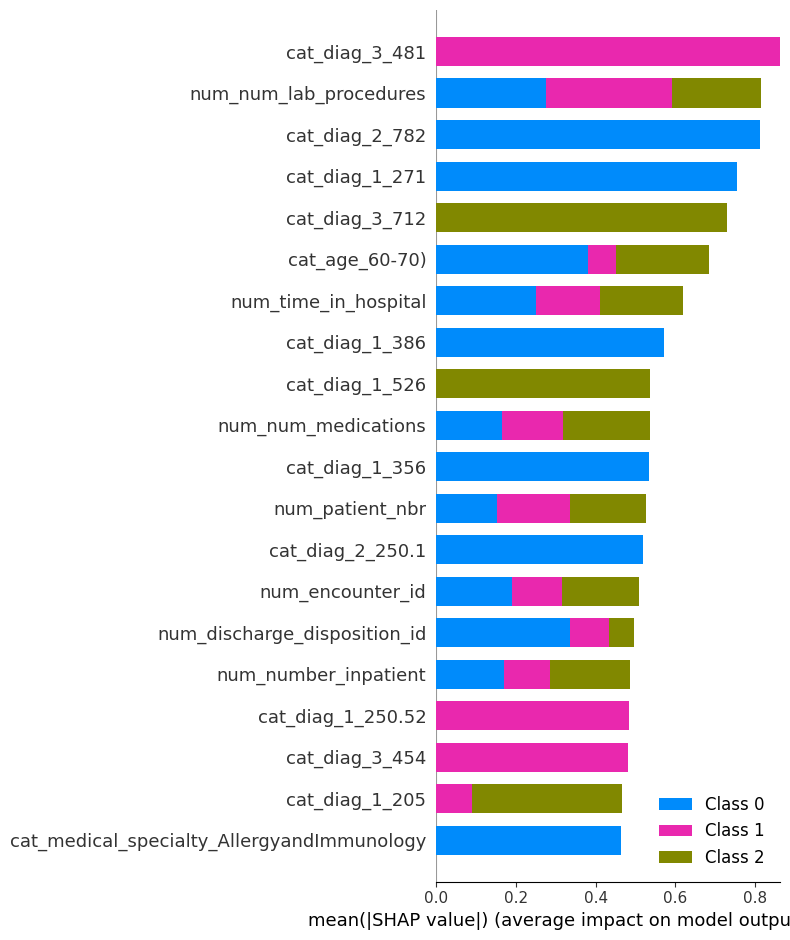

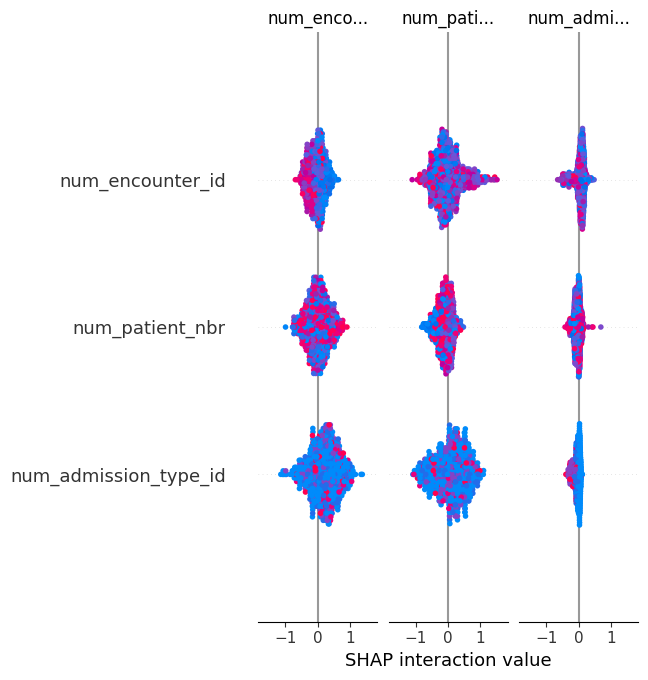

In [16]:
import shap
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# ---------------- Load Data ----------------
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\diabetic_data.csv\diabetic_data.csv")
target_col = "readmitted"
X = df.drop(columns=[target_col])
y = df[target_col]

# ---------------- Encode Target ----------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ---------------- Train/Test Split ----------------
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ---------------- Preprocessing ----------------
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# ---------------- Model ----------------
xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

xgb_pipe.fit(X_train, y_train_encoded)
xgb_clf = xgb_pipe.named_steps['clf']

# ---------------- Preprocess Test Data ----------------
X_test_pre = xgb_pipe.named_steps['preprocessor'].transform(X_test)

## ---------------- Subset for SHAP ----------------
n_shap = min(1000, X_test_pre.shape[0])
X_shap_arr = X_test_pre[:n_shap]

# Convert to dense if sparse
if hasattr(X_shap_arr, "toarray"):
    X_shap_arr = X_shap_arr.toarray()

# ---------------- Feature Names ----------------
raw_feature_names = xgb_pipe.named_steps['preprocessor'].get_feature_names_out()
clean_feature_names = [
    re.sub(r'[\[\]<]', '_', name).replace('__', '_').strip('_') or f"feature_{i}"
    for i, name in enumerate(raw_feature_names)
]

# Create DataFrame
X_shap_df = pd.DataFrame(X_shap_arr, columns=clean_feature_names)

# ---------------- SHAP ----------------
explainer_xgb = shap.TreeExplainer(xgb_clf)
shap_values_xgb = explainer_xgb.shap_values(X_shap_df)

# ---------------- SHAP Plots ----------------
shap.summary_plot(shap_values_xgb, X_shap_df, plot_type="bar")
shap.summary_plot(shap_values_xgb, X_shap_df)  # Beeswarm

